In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

In [2]:
training_data = pd.read_csv("dataset/train.csv")

In [3]:
Y = training_data['label']
X = training_data.drop('label', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [4]:
#Normalize data
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

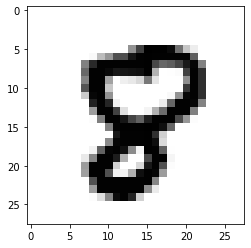

In [5]:
plt.imshow(X_test.iloc[4, :].values.reshape(28,28), cmap=plt.cm.binary)

In [6]:
model = tf.keras.models.Sequential()

In [7]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'] )

In [9]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
985/985 [==============================] - 1s 440us/step - loss: 0.7821 - accuracy: 0.7981
Epoch 2/10
985/985 [==============================] - 0s 432us/step - loss: 0.2120 - accuracy: 0.9366
Epoch 3/10
985/985 [==============================] - 0s 431us/step - loss: 0.1409 - accuracy: 0.9573
Epoch 4/10
985/985 [==============================] - 0s 430us/step - loss: 0.1109 - accuracy: 0.9642
Epoch 5/10
985/985 [==============================] - 0s 421us/step - loss: 0.0852 - accuracy: 0.9748
Epoch 6/10
985/985 [==============================] - 0s 420us/step - loss: 0.0663 - accuracy: 0.9804
Epoch 7/10
985/985 [==============================] - 0s 420us/step - loss: 0.0479 - accuracy: 0.9859
Epoch 8/10
985/985 [==============================] - 0s 421us/step - loss: 0.0394 - accuracy: 0.9888
Epoch 9/10
985/985 [==============================] - 0s 419us/step - loss: 0.0299 - accuracy: 0.9914
Epoch 10/10
985/985 [==============================] - 0s 420us/step - loss: 0.026

In [10]:
loss, accuracy = model.evaluate(X_test, Y_test)

329/329 [==============================] - 0s 282us/step - loss: 0.1106 - accuracy: 0.9700


In [11]:
print(loss, accuracy)

0.11055216193199158 0.9700000286102295


In [12]:
testing_data = pd.read_csv("dataset/test.csv")

In [14]:
pred = model.predict(testing_data)

In [15]:
pred

array([[2.1492224e-09, 8.1003287e-07, 4.1300503e-08, ..., 6.5946653e-05,
        2.1842759e-05, 9.3388981e-01],
       [7.9901081e-09, 9.6537693e-09, 8.1633672e-08, ..., 1.2133194e-14,
        4.4676613e-06, 1.6406564e-11],
       [4.6860532e-10, 9.9975401e-01, 4.5146619e-05, ..., 1.4809064e-04,
        3.9430040e-05, 1.6737065e-09],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.5452851e-43, 0.0000000e+00],
       [3.3631163e-43, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.5452851e-43, 0.0000000e+00],
       [4.9045446e-44, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [16]:
model2 = tf.keras.models.load_model("mlp")

In [17]:
model2.predict(testing_data)

array([[2.3034570e+28, 1.4012985e-45, 1.7217433e+36, ..., 1.4012985e-45,
        4.3508343e+25, 1.4012985e-45],
       [1.7312456e+36, 1.4012985e-45, 1.7311239e+36, ..., 1.4012985e-45,
        1.7254246e+36, 1.4012985e-45],
       [6.7962232e+25, 1.4012985e-45, 1.8014431e+36, ..., 1.4012985e-45,
        1.7986035e+36, 1.4012985e-45],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)